In [1]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')


# para pintar
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

In [2]:
shark_attacks=pd.read_csv('./attacks.csv',encoding='latin')

In [3]:
shark_attacks.shape

(25723, 24)

In [4]:
df=shark_attacks.copy()  #copia de la original

In [5]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
len(df.columns)

24

In [7]:
#Columnas numericas

num_df=df.select_dtypes(exclude='object')

num_df.columns

Index(['Year', 'original order'], dtype='object')

In [8]:
##Columnas categoricas

cat_df=df.select_dtypes(exclude=['int64', 'float64'])

cat_df.columns

Index(['Case Number', 'Date', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [9]:
print(num_df.shape[1])  #nº columnas numericas
print(cat_df.shape[1])  #nº columnas categoricas

2
22


In [10]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [11]:
n_cols=[c.lower().replace(' ', '') for c in df.columns]



In [12]:
{k:v for k,v in zip(df.columns, n_cols)}

{'Case Number': 'casenumber',
 'Date': 'date',
 'Year': 'year',
 'Type': 'type',
 'Country': 'country',
 'Area': 'area',
 'Location': 'location',
 'Activity': 'activity',
 'Name': 'name',
 'Sex ': 'sex',
 'Age': 'age',
 'Injury': 'injury',
 'Fatal (Y/N)': 'fatal(y/n)',
 'Time': 'time',
 'Species ': 'species',
 'Investigator or Source': 'investigatororsource',
 'pdf': 'pdf',
 'href formula': 'hrefformula',
 'href': 'href',
 'Case Number.1': 'casenumber.1',
 'Case Number.2': 'casenumber.2',
 'original order': 'originalorder',
 'Unnamed: 22': 'unnamed:22',
 'Unnamed: 23': 'unnamed:23'}

In [13]:
# k=vieja columna, v=nueva columna, todas o algunas

df=df.rename(columns={k:v for k,v in zip(df.columns, n_cols)})  # todas

df.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [14]:
n_cols=[c.replace('.', '_') for c in df.columns]

In [15]:
{k:v for k,v in zip(df.columns, n_cols)}

{'casenumber': 'casenumber',
 'date': 'date',
 'year': 'year',
 'type': 'type',
 'country': 'country',
 'area': 'area',
 'location': 'location',
 'activity': 'activity',
 'name': 'name',
 'sex': 'sex',
 'age': 'age',
 'injury': 'injury',
 'fatal(y/n)': 'fatal(y/n)',
 'time': 'time',
 'species': 'species',
 'investigatororsource': 'investigatororsource',
 'pdf': 'pdf',
 'hrefformula': 'hrefformula',
 'href': 'href',
 'casenumber.1': 'casenumber_1',
 'casenumber.2': 'casenumber_2',
 'originalorder': 'originalorder',
 'unnamed:22': 'unnamed:22',
 'unnamed:23': 'unnamed:23'}

In [16]:
# k=vieja columna, v=nueva columna, todas o algunas

df=df.rename(columns={k:v for k,v in zip(df.columns, n_cols)})  # todas

df.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber_1,casenumber_2,originalorder,unnamed:22,unnamed:23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [17]:
n_cols=[c.replace('(y/n)', '') for c in df.columns]
{k:v for k,v in zip(df.columns, n_cols)}
df=df.rename(columns={k:v for k,v in zip(df.columns, n_cols)})  # todas

df.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigatororsource,pdf,hrefformula,href,casenumber_1,casenumber_2,originalorder,unnamed:22,unnamed:23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(6312, 24)

In [20]:
nan_cols=df.isna().sum()  # serie con los valores nulos por columna

nan_cols[nan_cols>0]

casenumber                 2
date                      10
year                      12
type                      14
country                   60
area                     465
location                 550
activity                 554
name                     220
sex                      575
age                     2841
injury                    38
fatal                    549
time                    3364
species                 2848
investigatororsource      27
pdf                       10
hrefformula               11
href                      10
casenumber_1              10
casenumber_2              10
originalorder              3
unnamed:22              6311
unnamed:23              6310
dtype: int64

In [21]:
nan_cols_per=df.isna().mean() * 100  # porcentaje de nulos por columna

nan_cols_per[nan_cols_per>0]

casenumber               0.031686
date                     0.158428
year                     0.190114
type                     0.221800
country                  0.950570
area                     7.366920
location                 8.713561
activity                 8.776933
name                     3.485425
sex                      9.109632
age                     45.009506
injury                   0.602028
fatal                    8.697719
time                    53.295311
species                 45.120406
investigatororsource     0.427757
pdf                      0.158428
hrefformula              0.174271
href                     0.158428
casenumber_1             0.158428
casenumber_2             0.158428
originalorder            0.047529
unnamed:22              99.984157
unnamed:23              99.968314
dtype: float64

In [22]:
high_nancols=list(nan_cols_per[nan_cols_per>80].index )  #lista de las columnas con +80% de valores nulos
high_nancols

['unnamed:22', 'unnamed:23']

In [23]:
df.drop(columns=high_nancols,inplace=True)    #eliminar columnas con +80% de valores nulos

In [24]:
df.shape,shark_attacks.shape    #comparar el tamaños del archivo original vs el actual (drop 5 columnas)

((6312, 22), (25723, 24))

In [25]:
df['casenumber'].fillna('unknown', inplace=True)   #quitamos nulos en casenumber

In [26]:
df.columns

Index(['casenumber', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigatororsource', 'pdf', 'hrefformula', 'href', 'casenumber_1',
       'casenumber_2', 'originalorder'],
      dtype='object')

In [27]:
for c in df.columns:       #valores unicos de cada columna
    
    columna=c
    
    print(c,'- valores únicos: ',len(df[columna].unique()))
    
    
    
    

casenumber - valores únicos:  6288
date - valores únicos:  5434
year - valores únicos:  250
type - valores únicos:  9
country - valores únicos:  213
area - valores únicos:  826
location - valores únicos:  4109
activity - valores únicos:  1533
name - valores únicos:  5231
sex - valores únicos:  7
age - valores únicos:  158
injury - valores únicos:  3738
fatal - valores únicos:  9
time - valores únicos:  367
species - valores únicos:  1550
investigatororsource - valores únicos:  4970
pdf - valores únicos:  6292
hrefformula - valores únicos:  6291
href - valores únicos:  6286
casenumber_1 - valores únicos:  6286
casenumber_2 - valores únicos:  6287
originalorder - valores únicos:  6309


In [28]:
df.tail(10)

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigatororsource,pdf,hrefformula,href,casenumber_1,casenumber_2,originalorder
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.columns

Index(['casenumber', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigatororsource', 'pdf', 'hrefformula', 'href', 'casenumber_1',
       'casenumber_2', 'originalorder'],
      dtype='object')

In [30]:
df.drop_duplicates(subset=['date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigatororsource', 'pdf', 'hrefformula', 'href', 'casenumber_1',
       'casenumber_2'],inplace=True)


In [31]:
df.shape

(6303, 22)

In [32]:
df.iloc[6147:6160]

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigatororsource,pdf,hrefformula,href,casenumber_1,casenumber_2,originalorder
6147,1767.00.00,1767,1767.0,Invalid,FRANCE,Côte d'Azur,St. Tropez,Bathing,Samuel Matthews,M,NaN,Lacerations to arm & leg,NaN,NaN,Description of shark does not ring true,NaN,1767.00.00-Matthews.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1767.00.00,1767.00.00,156.0
6148,1764.00.00,1764,1764.0,Unprovoked,SPAIN,NaN,Guadalquivir River,Swimming,male,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1764.00.00-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1764.00.00,1764.00.00,155.0
6149,1758.00.00,1758,1758.0,Unprovoked,MEDITERRANEAN SEA,NaN,NaN,Fell overboard from a frigate & was swallowed ...,sailor,M,NaN,"""He was taken up alive and but little injured.""",N,NaN,"""The fish was harpooned, dried, and presented ...",A.M. Hodgkin,1758.00.00-Mediterranean.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1758.00.00,1758.00.00,154.0
6150,1753.10.27.R,Reported 27-Oct-1753,1753.0,Unprovoked,JAMAICA,NaN,Kingston Harbor,Fell overboard,male,M,NaN,FATAL,Y,NaN,NaN,"Maryland Gazette, 1/31/1754",1753.10.27.R-Jamaica.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1753.10.27.R,1753.10.27.R,153.0
6151,1751.07.27,27-Jul-1751,1751.0,Unprovoked,USA,Massachusetts,NaN,Swimming,male,M,NaN,FATAL,Y,NaN,NaN,"Pennsylvania Gazette, 8/15/1751",1751.07.27-Massachusetts.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1751.07.27,1751.07.27,152.0
6152,1749.00.00,1749,1749.0,Unprovoked,CUBA,Havana Province,Havana Harbor,Swimming,Brook Watson,M,14,Right leg severed at knee. In 1796 he became ...,N,NaN,NaN,GSAF,1749.00.00-Watson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1749.00.00,1749.00.00,151.0
6153,1755.00.00,1755,1755.0,Unprovoked,SWEDEN,Skagerrak arm of the North Sea,Bohuslän,NaN,Fishermen,M,NaN,NaN,UNKNOWN,NaN,NaN,"C. Moore, GSAF",1755.00.00-Sweden.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1755.00.00,1755.00.00,150.0
6154,1748.00.00,1748,1748.0,Unprovoked,PANAMA,Las Perlas archipelago,Taboga & Isla del Rey,Pearl diving,African slaves,M,NaN,FATAL,Y,NaN,NaN,"J. Castro, et al",1748.00.00.R-LasPerlas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1748.00.00,1748.00.00,149.0
6155,1742.12.17,17-Dec-1742,1742.0,Unprovoked,NaN,NaN,Carlisle Bay,Swimming,2 impressed seamen,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1742.12.17-AdviceSeamen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1742.12.17,1742.12.17,148.0
6156,1738.04.06.R,Reported 06-Apr-1738,1738.0,Unprovoked,ITALY,Sicily,Strait of Messina,Swimming,male,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1738.04.06.R-Messina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1738.04.06.R,1738.04.06.R,147.0


In [33]:
#convertir valores de 'casenumber' a str

for e in df.casenumber:
    e=str(e)


In [34]:
lst=[]

for x in df.casenumber: 
    
    if len(x) == 10:
        lst.append('-'.join(x.split('.')[:3]))     #crea una lista en la que si tiene mas de 10 caracteres quite lo que haya a la derecha del ultimo punto y lo añada. pun
        
        
    else:
        x='unknown'       #sino que lo añada a sustituyendolo por undefined
        lst.append(x)
    
lst


['2018-06-25',
 '2018-06-18',
 '2018-06-09',
 '2018-06-08',
 '2018-06-04',
 'unknown',
 'unknown',
 '2018-05-27',
 'unknown',
 'unknown',
 '2018-05-24',
 '2018-05-21',
 'unknown',
 'unknown',
 '2018-05-00',
 '2018-05-12',
 '2018-05-09',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 '2018-04-24',
 '2018-04-23',
 '2018-04-22',
 '2018-04-19',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 '2018-04-14',
 'unknown',
 '2018-04-09',
 '2018-04-05',
 '2018-04-03',
 '2018-03-31',
 '2018-03-14',
 'unknown',
 'unknown',
 '2018-02-24',
 '2018-02-23',
 '2018-02-17',
 '2018-02-15',
 '2018-02-14',
 '2018-02-11',
 '2018-02-03',
 '2018-02-01',
 '2018-01-28',
 '2018-01-21',
 '2018-01-14',
 '2018-01-13',
 '2018-01-12',
 '2018-01-05',
 '2017-12-31',
 '2017-12-30',
 '2017-12-21',
 '2017-12-09',
 'unknown',
 'unknown',
 'unknown',
 '2017-11-24',
 '2017-11-18',
 'unknown',
 '2017-11-13',
 '2017-11-04',
 'unknown',
 '2017-10-28',
 '2017-10-26',
 'unknown',
 'unknown',
 'unknown',
 '2017-10-22'

In [35]:
lst2=[]

for x in lst: 
    
    if '-00' not in  x:
        lst2.append(x)     #crea una lista en la que si tiene mas de 10 caracteres quite lo que haya a la derecha del ultimo punto y lo añada. pun
        
        
    else:
        x='unknown'       #sino que lo añada a sustituyendolo por undefined
        lst2.append(x)
    
lst2



['2018-06-25',
 '2018-06-18',
 '2018-06-09',
 '2018-06-08',
 '2018-06-04',
 'unknown',
 'unknown',
 '2018-05-27',
 'unknown',
 'unknown',
 '2018-05-24',
 '2018-05-21',
 'unknown',
 'unknown',
 'unknown',
 '2018-05-12',
 '2018-05-09',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 '2018-04-24',
 '2018-04-23',
 '2018-04-22',
 '2018-04-19',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 '2018-04-14',
 'unknown',
 '2018-04-09',
 '2018-04-05',
 '2018-04-03',
 '2018-03-31',
 '2018-03-14',
 'unknown',
 'unknown',
 '2018-02-24',
 '2018-02-23',
 '2018-02-17',
 '2018-02-15',
 '2018-02-14',
 '2018-02-11',
 '2018-02-03',
 '2018-02-01',
 '2018-01-28',
 '2018-01-21',
 '2018-01-14',
 '2018-01-13',
 '2018-01-12',
 '2018-01-05',
 '2017-12-31',
 '2017-12-30',
 '2017-12-21',
 '2017-12-09',
 'unknown',
 'unknown',
 'unknown',
 '2017-11-24',
 '2017-11-18',
 'unknown',
 '2017-11-13',
 '2017-11-04',
 'unknown',
 '2017-10-28',
 '2017-10-26',
 'unknown',
 'unknown',
 'unknown',
 '2017-10-22',
 

In [36]:
df['casenumber']=lst2   # sustituye la lista (lst) creada en la columna case_number

In [37]:
df.casenumber.value_counts()

unknown       2559
2005-04-06       2
1990-05-10       2
2014-08-02       2
2009-12-18       2
              ... 
2000-09-11       1
2000-08-31       1
2000-08-30       1
2000-08-21       1
1703-03-26       1
Name: casenumber, Length: 3737, dtype: int64

In [38]:
df[['casenumber','date','casenumber_1','casenumber_2','year']].iloc[6140:6170]

,casenumber,date,casenumber_1,casenumber_2,year
6140,1784-12-12,12-Dec-1784,1784.12.12,1784.12.12,1784.0
6141,1783-03-02,02-Mar-1783,1783.03.02,1783.03.02,1783.0
6142,1780-08-08,08-Aug-1780,1780.08.08,1780.08.08,1780.0
6143,unknown,1779,1779.00.00,1779.00.00,1779.0
6144,unknown,Reported 1776,1776.00.00.R,1776.00.00.R,1776.0
6145,unknown,1776,1776.00.00.b,1776.00.00.b,1776.0
6146,unknown,Reported 12-Jul-1771,1771.07.12.R,1771.07.12.R,1771.0
6147,unknown,1767,1767.00.00,1767.00.00,1767.0
6148,unknown,1764,1764.00.00,1764.00.00,1764.0
6149,unknown,1758,1758.00.00,1758.00.00,1758.0


In [39]:
df_fecha=df[df.casenumber!= 'unknown']   #nuevo data frame filtrado por fechas que no sean unkwon

In [40]:
df_fecha=df_fecha.sort_values(by=['casenumber'], ascending=False)  #ordenado por fecha en modo descendente
df_fecha.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigatororsource,pdf,hrefformula,href,casenumber_1,casenumber_2,originalorder
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [41]:
nan_cols=df.isna().sum()  # serie con los valores nulos por columna

nan_cols[nan_cols>0]

date                       1
year                       3
type                       5
country                   51
area                     456
location                 541
activity                 545
name                     211
sex                      566
age                     2832
injury                    29
fatal                    540
time                    3355
species                 2839
investigatororsource      18
pdf                        1
hrefformula                2
href                       1
casenumber_1               1
casenumber_2               1
dtype: int64

In [42]:
df.type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [43]:
type_null=df[df.type.isna()]        #nulos en type
type_null

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigatororsource,pdf,hrefformula,href,casenumber_1,casenumber_2,originalorder
85,unknown,15-Sep-2017,2017.0,NaN,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,NaN,Injuries to hands and legs,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0
382,2015-07-27,27-Jul-2015,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0
4867,unknown,Reported 11-Sep-1936,1936.0,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,NaN,FATAL,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0
5705,unknown,Reported 03-Mar-1890,1890.0,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,NaN,FATAL,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0
6302,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0


In [44]:
df['type'].fillna('unknown',inplace=True)

In [45]:
df.type.value_counts()      #comprobar que ya no hay nulos

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
unknown            5
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [46]:
#correccion mala nomenclatura en type

df['type'].replace(['Boating', 'Boatomg', 'Questionable'],['Boat', 'Boat', 'unknown'], inplace=True)

In [47]:
df.type.value_counts()       #correccion mala nomenclatura en type

Unprovoked      4595
Provoked         574
Invalid          547
Boat             341
Sea Disaster     239
unknown            7
Name: type, dtype: int64

In [48]:
df.fatal.value_counts()         #valores distintos en fatal

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: fatal, dtype: int64

In [49]:
df['fatal'].replace(['M',' N','N ','2017','y','UNKNOWN'],['N','N','N','N','Y','unknown'], inplace=True)  #m,n y 

In [50]:
df.fatal.value_counts()

N          4303
Y          1389
unknown      71
Name: fatal, dtype: int64

In [51]:
df.sex.value_counts()       #valores distintos en sex

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: sex, dtype: int64

In [52]:
df['sex'].fillna('unknown', inplace=True)   #quitamos nulos de sex

In [53]:
keyword = 'lli' #sirve para buscar en mi dataframe
select = df[df.sex.str.contains(keyword, regex=True)]
select.head()


,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigatororsource,pdf,hrefformula,href,casenumber_1,casenumber_2,originalorder
1624,unknown,11-Nov-2004,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.11.b,2004.11.11.b,4679.0


In [54]:
df.at[1624,'sex']='M'

In [55]:
df['sex'].replace(['.','M ','N'],['unknown','M','unknown',], inplace=True)

In [56]:
df.sex.value_counts()

M          5097
F           637
unknown     569
Name: sex, dtype: int64

In [57]:
df[df.year.isna()]        #nulos en type


,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigatororsource,pdf,hrefformula,href,casenumber_1,casenumber_2,originalorder
187,unknown,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,unknown,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0
6302,unknown,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0


In [58]:
df['year'].fillna('unknown', inplace=True)   #quitamos nulos de year

In [59]:
df.loc[df['year']=='unknown']

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigatororsource,pdf,hrefformula,href,casenumber_1,casenumber_2,originalorder
187,unknown,Reported 08-Jan-2017,unknown,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,unknown,Reported 19-Aug-1836,unknown,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0
6302,unknown,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0


In [60]:
df.at[187,'year']=2017
df.at[6079,'year']=1836
df.at[6302,'year']=1836

In [61]:
df['year']=df['year'].astype('int')

In [62]:
df['species'].fillna('unknown', inplace=True)

In [63]:
df['species'] = df['species'].str.lower()

In [64]:
df.species.unique().sum()

'white sharkunknown2 m sharktiger shark, 3mtiger sharklemon shark, 3\'bull shark, 6\'grey reef sharkinvalid incidenttawny nurse shark, 2mshark involvement not confirmedquestionable3 m sharkwhite shark, 3.5 mwhite shark, 2.5 m6\' sharkjuvenile bull sharkbull sharktiger shark, 12\'wobbegong shark3.5 m shark1.8 m sharkblacktip sharkjuvenile white shark,  2.7 to 3.2 mbull shark, 2 mpossibly a wobbegonginjury believed caused by an eel, not a sharkgalapagos shark?2m sharkbull shark, 3 m grey reef shark. 2 msmall sharkwobbegong shark?juvenile nurse sharknurse shark. 5\'tiger shark, femalesome drowned but other may have been killed by blue sharkswhite shark, 4.6 mcookiecutter sharkwobbegong shark, 1 mwhite shark, 4.5 mspinner shark, 4 to 5 feettiger shark, 8 to 10 feet8\' sharkdeath may have been due to drowning5\' shark4\' to 5\' sharkporbeagle, 1.5 mwhite shark, 3.5m5\' to 6\' sharkwhite shark, 3 to 3.5m nurse sharkwhite shark, 3 mshark involvement questionablewhite shark, 5\' to 7\'possibly

In [65]:
searchfor='|'.join(['questionable','doubt','involvement', 'invalid' , 'unidentified','unconfirmed','not'])

df.loc[df['species'].str.contains(searchfor),'species'] = 'unknown'

In [66]:
df.loc[df['species'].str.contains('white'), 'species'] = 'white_shark'

In [67]:
df.loc[df['species'].str.contains('mako'), 'species'] = 'mako_shark'

In [68]:
df.loc[df['species'].str.contains('hammer'), 'species'] = 'hammer_shark'

In [69]:
df.loc[df['species'].str.contains('tiger'), 'species'] = 'tiger_shark'

In [70]:
df.loc[df['species'].str.contains('bronze'), 'species'] = 'bronze_shark'

In [71]:
df.loc[df['species'].str.contains('galapagos'), 'species'] = 'galapagos_shark'

In [72]:
df.loc[df['species'].str.contains('nurse'), 'species'] = 'nurse_shark'

In [73]:
df.loc[df['species'].str.contains('spinner'), 'species'] = 'spinner_shark'

In [74]:
df.loc[df['species'].str.contains('bull'), 'species'] = 'bull_shark'

In [75]:
df.loc[df['species'].str.contains('blue'), 'species'] = 'blue_shark'

In [76]:
df.loc[df['species'].str.contains('black'), 'species'] = 'blacktip_shark'

In [77]:
df.loc[df['species'].str.contains('lemon'), 'species'] = 'lemon_shark'

In [78]:
df.loc[df['species'].str.contains('grey'), 'species'] = 'greyreef_shark'

In [79]:
df.loc[df['species'].str.contains('wobbegong'), 'species'] = 'wobbegong_shark'

In [80]:
df.loc[df['species'].str.contains('sand'), 'species'] = 'sandtiger_shark'

In [81]:
df.loc[df['species'].str.contains('seven'), 'species'] = 'sevengrill_shark'

In [82]:
df.loc[df['species'].str.contains('ragged'), 'species'] = 'raggedtooth_shark'

In [83]:
df.loc[df['species'].str.contains('caribbean'), 'species'] = 'caribbenreef_shark'

In [84]:
df.loc[df['species'].str.contains('beagle'), 'species'] = 'porbeagle_shark'

In [85]:
df.loc[df['species'].str.contains('horn'), 'species'] = 'horn_shark'

In [86]:
df.loc[df['species'].str.contains('zambesi'), 'species'] = 'zambesi_shark'

In [87]:
df.loc[df['species'].str.contains('whaler'), 'species'] = 'whaler_shark'

In [88]:
df.loc[df['species'].str.contains('silver'), 'species'] = 'silvertip_shark'

In [89]:
df.loc[df['species'].str.contains('guitar'), 'species'] = 'guitarfish_shark'

In [90]:
df.loc[df['species'].str.contains('salmon'), 'species'] = 'salmon_shark'

In [91]:
df.loc[df['species'].str.contains('dusky'), 'species'] = 'dusky_shark'

In [92]:
df.loc[df['species'].str.contains('silky'), 'species'] = 'silky_shark'

In [93]:
df.loc[df['species'].str.contains('canicula'), 'species'] = 'scyliorhinus canicula_shark'

In [94]:
df.species.value_counts()

unknown                                 3378
white_shark                              661
tiger_shark                              282
bull_shark                               177
nurse_shark                               94
                                        ... 
1.3 m [4'3"] shark                         1
>1.8 m [6'] shark                          1
leopard shark                              1
two 1.2 m to 1.5 m [4' to 5'] sharks       1
"a pack of sharks"                         1
Name: species, Length: 449, dtype: int64

In [99]:
especies=df[df.species.str.contains('_')]
especies

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigatororsource,pdf,hrefformula,href,casenumber_1,casenumber_2,originalorder
0,2018-06-25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,white_shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
4,2018-06-04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,tiger_shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
6,unknown,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,tiger_shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0
7,2018-05-27,27-May-2018,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,lemon_shark,"K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0
8,unknown,26-May-2018,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,bull_shark,"K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,unknown,A few years before 1938,0,Boat,ITALY,Adriatic Sea,NaN,Wooden fishing boat,Occupant: Mr. Maciotta,M,NaN,No injury to occupant; shark capsized boat,N,NaN,white_shark,A. De Maddalena; Anon. (1938),ND-0028-Maciotta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0028,ND.0028,29.0
6276,unknown,Early 1930s,0,Unprovoked,BELIZE,NaN,NaN,Standing,a servant,M,16,FATAL,Y,NaN,tiger_shark,Mitchell-Hedges,ND-0026-Belize.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0026,ND.0026,27.0
6293,unknown,Before 1906,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,blue_shark,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0
6294,unknown,Before 1906,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,blue_shark,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0


In [125]:
#cross table para ver la relacion del tipo de especie con si un ataque es fatal o no

cross_species=pd.crosstab(index=especies.species, columns=especies.fatal)

cross_species['total_attacks']=(cross_species.N+cross_species.Y+cross_species.unknown)

cross_species['N%']=cross_species.N/cross_species.total_attacks
cross_species['Y%']=cross_species.Y/cross_species.total_attacks
cross_species['unknown%']=cross_species.unknown/cross_species.total_attacks

cross_species['N%tot']=cross_species.N/sum(cross_species.N)
cross_species['Y%tot']=cross_species.Y/sum(cross_species.Y)


cross_species.sort_values(by='Y%',ascending=False)   #ordenador por el que más veces ataca fatalmente/las veces que ataca


fatal,N,Y,unknown,total_attacks,N%,Y%,unknown%,N%tot,Y%tot
species,,,,,,,,,
zambesi_shark,20,9,0,29,0.689655,0.310345,0.000000,0.013004,0.031034
whaler_shark,5,2,0,7,0.714286,0.285714,0.000000,0.003251,0.006897
galapagos_shark,5,2,0,7,0.714286,0.285714,0.000000,0.003251,0.006897
tiger_shark,207,71,2,280,0.739286,0.253571,0.007143,0.134590,0.244828
white_shark,501,149,7,657,0.762557,0.226788,0.010654,0.325748,0.513793
bull_shark,140,36,0,176,0.795455,0.204545,0.000000,0.091027,0.124138
blue_shark,44,11,0,55,0.800000,0.200000,0.000000,0.028609,0.037931
bronze_shark,60,4,0,64,0.937500,0.062500,0.000000,0.039012,0.013793
hammer_shark,46,3,0,49,0.938776,0.061224,0.000000,0.029909,0.010345


<AxesSubplot:>

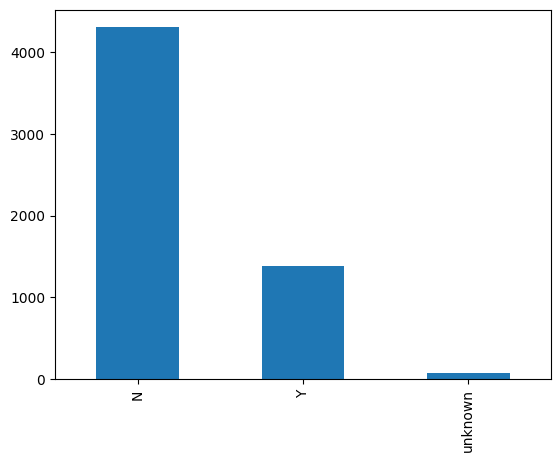

In [141]:
ten_years=df['fatal'].value_counts().plot(kind='bar')
ten_years

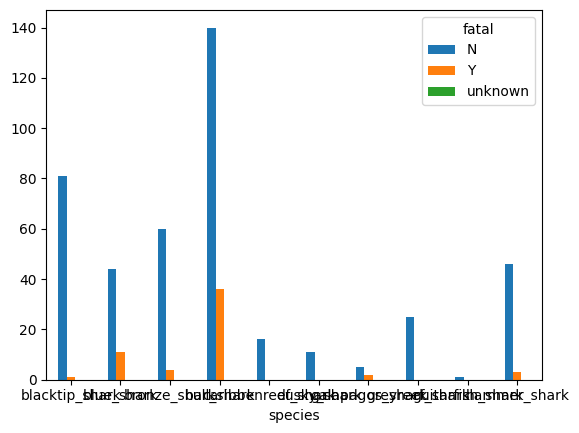

In [144]:
cross_species2=pd.crosstab(index=especies.species, columns=especies.fatal)

barplot = cross_species2[:10].plot.bar(rot=0)